# YZV 311E (Project Process Code File)
# Personalized Intervention for Alcohol Consumption
This project is a classification project where data science applications will be carried out on a data set of approximately 1 million rows created by the Korean Ministry of Health. The aim of the project is to detect citizens who consume alcohol by evaluating the physical and biological characteristics of people in the light of this data. For this, data analysis, data preprocessing, data visualization and machine learning methods will be applied step by step.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn

df = pd.read_csv("smoking_drinking_dataset_Ver01.csv")
pd.set_option('display.max_columns', None) # in order to see all the columns
df.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,92.0,99.0,218.0,77.0,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,58.0,89.0,196.0,66.0,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,N
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,80.0,94.0,185.0,58.0,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,85.0,104.0,217.0,56.0,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,Y
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,105.0,100.0,195.0,60.0,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y


In [7]:
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Seaborn version:", sns.__version__)

# sklearn altında yer alan modüllerin versiyonlarını kontrol etme
print("Scikit-learn version:", sklearn.__version__)
import sys
print(sys.version)

Pandas version: 2.1.2
NumPy version: 1.24.3
Matplotlib version: 3.8.1
Seaborn version: 0.13.0
Scikit-learn version: 1.3.0
3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


# 1. Data Understanding and Analysis

### Data Features Definition
- The "Sex" column indicates the gender of the individuals.
- "Age" represents the age, rounded up to the nearest 5 years.
- "Height" specifies the height, rounded up to the nearest 5 cm.
- The "Weight" column denotes the weight(kg), rounded up to the nearest 5 kg.
- Sight_left / Sight_right: These features describe the visual acuity in the eyes, vision impairment increases as the value increases.
- "Hear_left" and "Hear_right" indicate the hearing condition (1:normal, 2:abnormal).
- "SBP" stands for Systolic Blood Pressure, and "DBP" stands for Diastolic Blood Pressure, both measured in millimeters of mercury (mmHg). These values provide critical information about an individual's cardiovascular health, helping to diagnose hypertension (high blood pressure) and assess cardiovascular risk.
- "BLDS" represents Blood Sugar Level or Fasting Blood Glucose, measured in milligrams per deciliter (mg/dL). This value is important for monitoring blood sugar control and diagnosing conditions such as diabetes.
- Tot_chole / HDL_chole / LDL_chole / Triglyceride: These columns pertain to cholesterol levels in the blood. "Tot_chole" represents total cholesterol, "HDL_chole" is High-Density Lipoprotein cholesterol (good cholesterol), "LDL_chole" is Low-Density Lipoprotein cholesterol (bad cholesterol), and "Triglyceride" measures a type of fat in the blood. These values are crucial for assessing cardiovascular health and risk.
- "Hemoglobin" denotes the level of hemoglobin in the blood, measured in grams per deciliter (g/dL). Hemoglobin is vital for oxygen transport, and this measurement is used to assess anemia and overall blood health.
- "Urine_protein" indicates the presence of protein in urine, with values ranging from 1 (-) to 6 (+4). It is a marker for kidney function and can help diagnose kidney disease and related conditions.
- "Serum_creatinine" represents the concentration of serum (blood) creatinine, measured in milligrams per deciliter (mg/dL). It is used to assess kidney function and is important for monitoring renal health.
- SGOT_AST / SGOT_ALT / Gamma_GTP: These columns include enzyme measurements related to liver and metabolic health. "SGOT_AST" and "SGOT_ALT" are enzymes used to assess liver function, while "Gamma_GTP" is involved in various metabolic processes. Elevated levels can indicate liver or bile duct issues.
- "SMK_stat_type_cd" indicates the smoking status of individuals, with values of 1 (never smoked), 2 (used to smoke but quit), or 3 (still smoke).
- "DRK_YN" represents whether individuals are drinkers (Y for Yes) or non-drinkers (N for No).

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

**All of the features are in numerical type, except one**
- This allows using machine learning algorithms without encoding.
- Additionally, numerical data generally offers more feature engineering options. In particular, we can derive new features by applying statistical operations on numerical data.
- Numerical data can be expressed more effectively using graphs and visualizations. This can help us better understand patterns and relationships in the data set.
- Numerical data is often available at a specific scale, which can help the model perform better.

In [3]:
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

**The fact that no column contains NaN values facilitates data analysis and the training process of the model; This is a very positive situation due to factors such as increasing visualization and model performance. Otherwise, removing rows containing NaN values could lead to data loss, and filling in NaN values using various methods could lead to data corruption.**

In [4]:
# Detection of duplicated rows
duplicates = df.duplicated() 
print("Number of duplicated rows:", len(df[duplicates]))

Number of duplicated rows: 26


In [5]:
# Dropping duplicated data
df = df.drop_duplicates()

#### By dropping duplicated data, the following possible situations are prevented:
- Duplicated data can be misleading in analysis and may affect the accuracy of the results.
- Duplicated data can mask the true pattern or trend in the data set.
- Duplicated data can cause errors, especially in statistical calculations and model building.

In [6]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000
mean,47.614529,162.240563,63.283884,81.233255,0.980833,0.978428,1.031495,1.030476,122.432360,76.052549,100.424305,195.556769,56.936984,113.037429,132.140030,14.229810,1.094221,0.860467,25.989424,25.755148,37.136152,1.608112
std,14.181346,9.282922,12.514101,11.850296,0.605954,0.604779,0.174652,0.171892,14.543083,9.889334,24.179852,38.660092,17.238578,35.842938,102.194762,1.584924,0.437719,0.480536,23.493668,26.308910,50.423811,0.818504
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,25.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,88.000000,169.000000,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,193.000000,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,105.000000,219.000000,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,852.000000,2344.000000,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


- Having the minimum age value of 20 will increase the accuracy of the model because the number of individuals under the age of 20 who consume alcohol is very small.
- Since features are expressed at different scales, scaling the data during the preprocessing stage can significantly improve model performance.
- The minimum and maximum values of the features waistline, tot_kol, HDL_kol, LDL_kol, triglyceride, serum_creatinine, SGOT_AST, SGOT_ALT and gamma_GTP seem quite unusual because these values do not show a consistent relationship with the distributions (25%, 75%) of the columns. These columns most likely contain outlier data. Therefore, these columns should be examined in the context of outlier data.
- **Since the data set contains quite a large number of columns, the columns can be reduced:**
    - Since sight_left and sight_right columns express the same thing and their statistical values are very close, a new column named sight can be created by combining them in order to reduce number of columns. The same can be applied to the hear_left and hear_right columns.
    - Since the statistical values of SGOT_AST and SGOT_ALT are quite similar to each other, one of these columns can be dropped.
    - After examining the correlation chart, columns that do not have a positive or negative relationship with any column can be dropped.

#### Correlation for examining the relationship between features:

In [7]:
df_numeric = df.drop(["sex", "DRK_YN"], axis=1)
df_numeric.corr()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
age,1.000000,-0.398501,-0.195333,0.127175,-0.172098,-0.167682,0.203023,0.198698,0.265532,0.108845,0.195800,0.011435,-0.104630,0.029487,0.043553,-0.173090,0.041489,0.022821,0.059405,-0.020508,0.017394,-0.126028
height,-0.398501,1.000000,0.668823,0.263937,0.139142,0.138527,-0.081159,-0.082469,0.035025,0.108779,0.021255,-0.023231,-0.148592,-0.015444,0.137611,0.531904,0.002290,0.171254,0.039206,0.144844,0.162337,0.467306
weight,-0.195333,0.668823,1.000000,0.637164,0.088908,0.088711,-0.044497,-0.045723,0.250765,0.277890,0.138576,0.063237,-0.287682,0.067856,0.283774,0.499496,0.029273,0.153883,0.099659,0.276445,0.221880,0.366488
waistline,0.127175,0.263937,0.637164,1.000000,0.004516,0.006160,0.033226,0.031004,0.272317,0.240887,0.175514,0.063198,-0.253983,0.063413,0.249436,0.291724,0.043131,0.098420,0.096863,0.212267,0.186988,0.205474
sight_left,-0.172098,0.139142,0.088908,0.004516,1.000000,0.307981,-0.039428,-0.041003,-0.035620,-0.001213,-0.034818,0.004372,-0.004227,0.003016,0.010598,0.085901,-0.010256,0.020309,-0.005427,0.018816,0.013563,0.064196
sight_right,-0.167682,0.138527,0.088711,0.006160,0.307981,1.000000,-0.040764,-0.038901,-0.033996,-0.000572,-0.036889,0.003439,-0.006258,0.002157,0.012262,0.086849,-0.010900,0.021447,-0.004600,0.018920,0.016493,0.065050
hear_left,0.203023,-0.081159,-0.044497,0.033226,-0.039428,-0.040764,1.000000,0.536899,0.056068,0.006895,0.039777,-0.024341,-0.029467,-0.014619,0.002098,-0.036057,0.019756,0.015254,0.011282,-0.007908,0.002992,-0.021244
hear_right,0.198698,-0.082469,-0.045723,0.031004,-0.041003,-0.038901,0.536899,1.000000,0.057417,0.007505,0.040898,-0.022864,-0.028044,-0.013438,0.002160,-0.036706,0.018240,0.012959,0.010764,-0.008688,0.003546,-0.022339
SBP,0.265532,0.035025,0.250765,0.272317,-0.035620,-0.033996,0.056068,0.057417,1.000000,0.741126,0.183134,0.068549,-0.111767,0.033613,0.185993,0.166524,0.063507,0.062608,0.081481,0.117615,0.161426,0.084907
DBP,0.108845,0.108779,0.277890,0.240887,-0.001213,-0.000572,0.006895,0.007505,0.741126,1.000000,0.136268,0.111908,-0.093835,0.066978,0.198647,0.241976,0.046043,0.057056,0.078558,0.131321,0.175613,0.126846


# 2. Data Visualization
### Scatter Plot

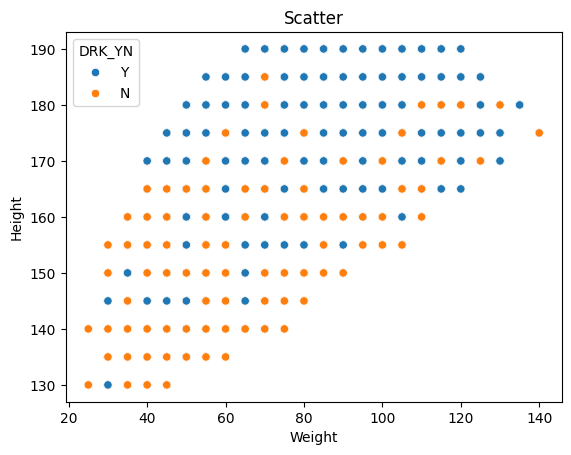

In [8]:
sns.scatterplot(data = df, x = 'weight', y = 'height', hue='DRK_YN')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Scatter')
plt.show()

It is clearly seen that drinking rates increase as height increases. The reason for this may be coincidental because there is no logical explanation. However, considering that the data set belongs to one million people, this may indicate a bias due to regional or cultural factors.

### Count Plot

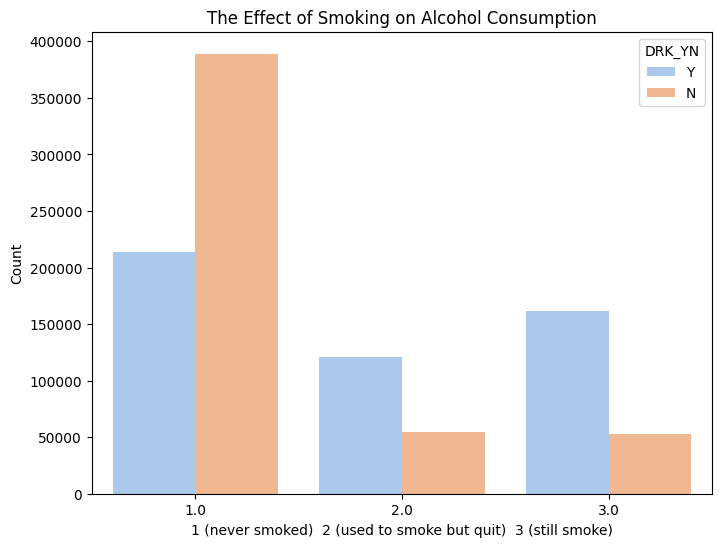

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SMK_stat_type_cd', data=df, hue='DRK_YN', palette='pastel')
plt.title('The Effect of Smoking on Alcohol Consumption')
plt.xlabel('1 (never smoked)  2 (used to smoke but quit)  3 (still smoke)')
plt.ylabel('Count')
plt.show()

The data set shows that the majority are non-smokers. Approximately 2/3 of non-smokers do not consume alcohol. However, this rate is the opposite for former smokers. Additionally, at least 3/4 of those who continue to smoke consume alcohol. From this it can be concluded that smoking directly affects alcohol consumption.

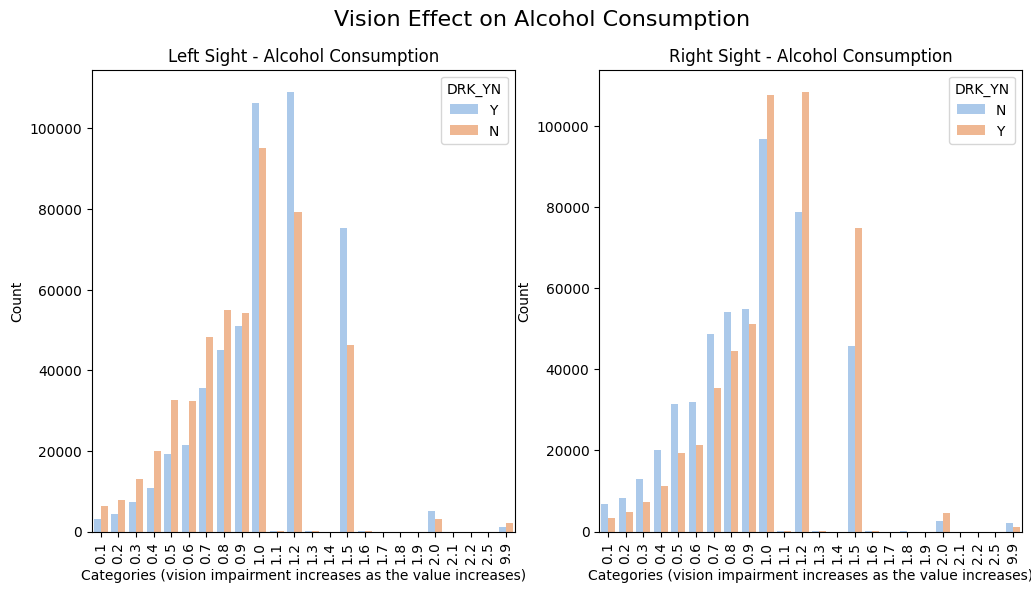

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='sight_left', data=df, hue='DRK_YN', palette='pastel')
plt.title('Left Sight - Alcohol Consumption')
plt.xlabel('Categories (vision impairment increases as the value increases)')
plt.xticks(rotation=90)
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='sight_right', data=df, hue='DRK_YN', palette='pastel')
plt.title('Right Sight - Alcohol Consumption')
plt.xlabel('Categories (vision impairment increases as the value increases)')
plt.xticks(rotation=90)
plt.ylabel('Count')

plt.suptitle('Vision Effect on Alcohol Consumption', fontsize=16)
plt.show()

First of all, it can be seen that the right eye chart and the left eye chart are almost the same. Therefore, two columns can be merged or one can be dropped. As can be seen in the images, as the visual impairment increases above 1, the ratio of drinkers to non-drinkers increases. But as we go below 1, this ratio reverses. From here we can conclude that there is no direct relationship between eyesight and alcohol consumption.

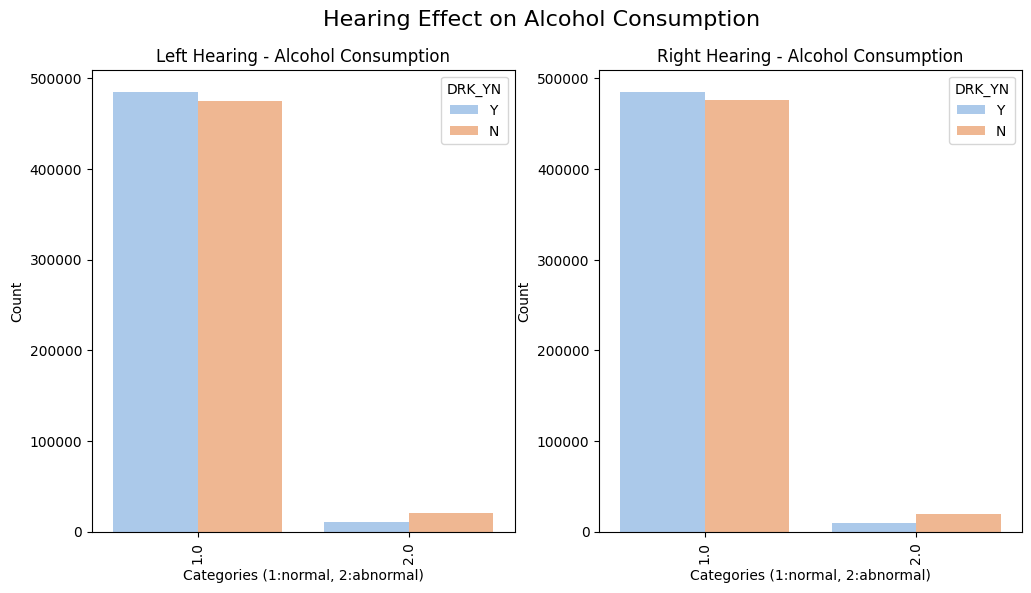

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='hear_left', data=df, hue='DRK_YN', palette='pastel')
plt.title('Left Hearing - Alcohol Consumption')
plt.xlabel('Categories (1:normal, 2:abnormal)')
plt.xticks(rotation=90)
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='hear_right', data=df, hue='DRK_YN', palette='pastel')
plt.title('Right Hearing - Alcohol Consumption')
plt.xlabel('Categories (1:normal, 2:abnormal)')
plt.xticks(rotation=90)
plt.ylabel('Count')

plt.suptitle('Hearing Effect on Alcohol Consumption', fontsize=16)
plt.show()

As with the vision graphs, there is not much difference between hearing graphs. Likewise, they can be combined and removed. Since the number of drinkers and non-drinkers is approximately equal, we can conclude that there is no relationship.

### Box Plot

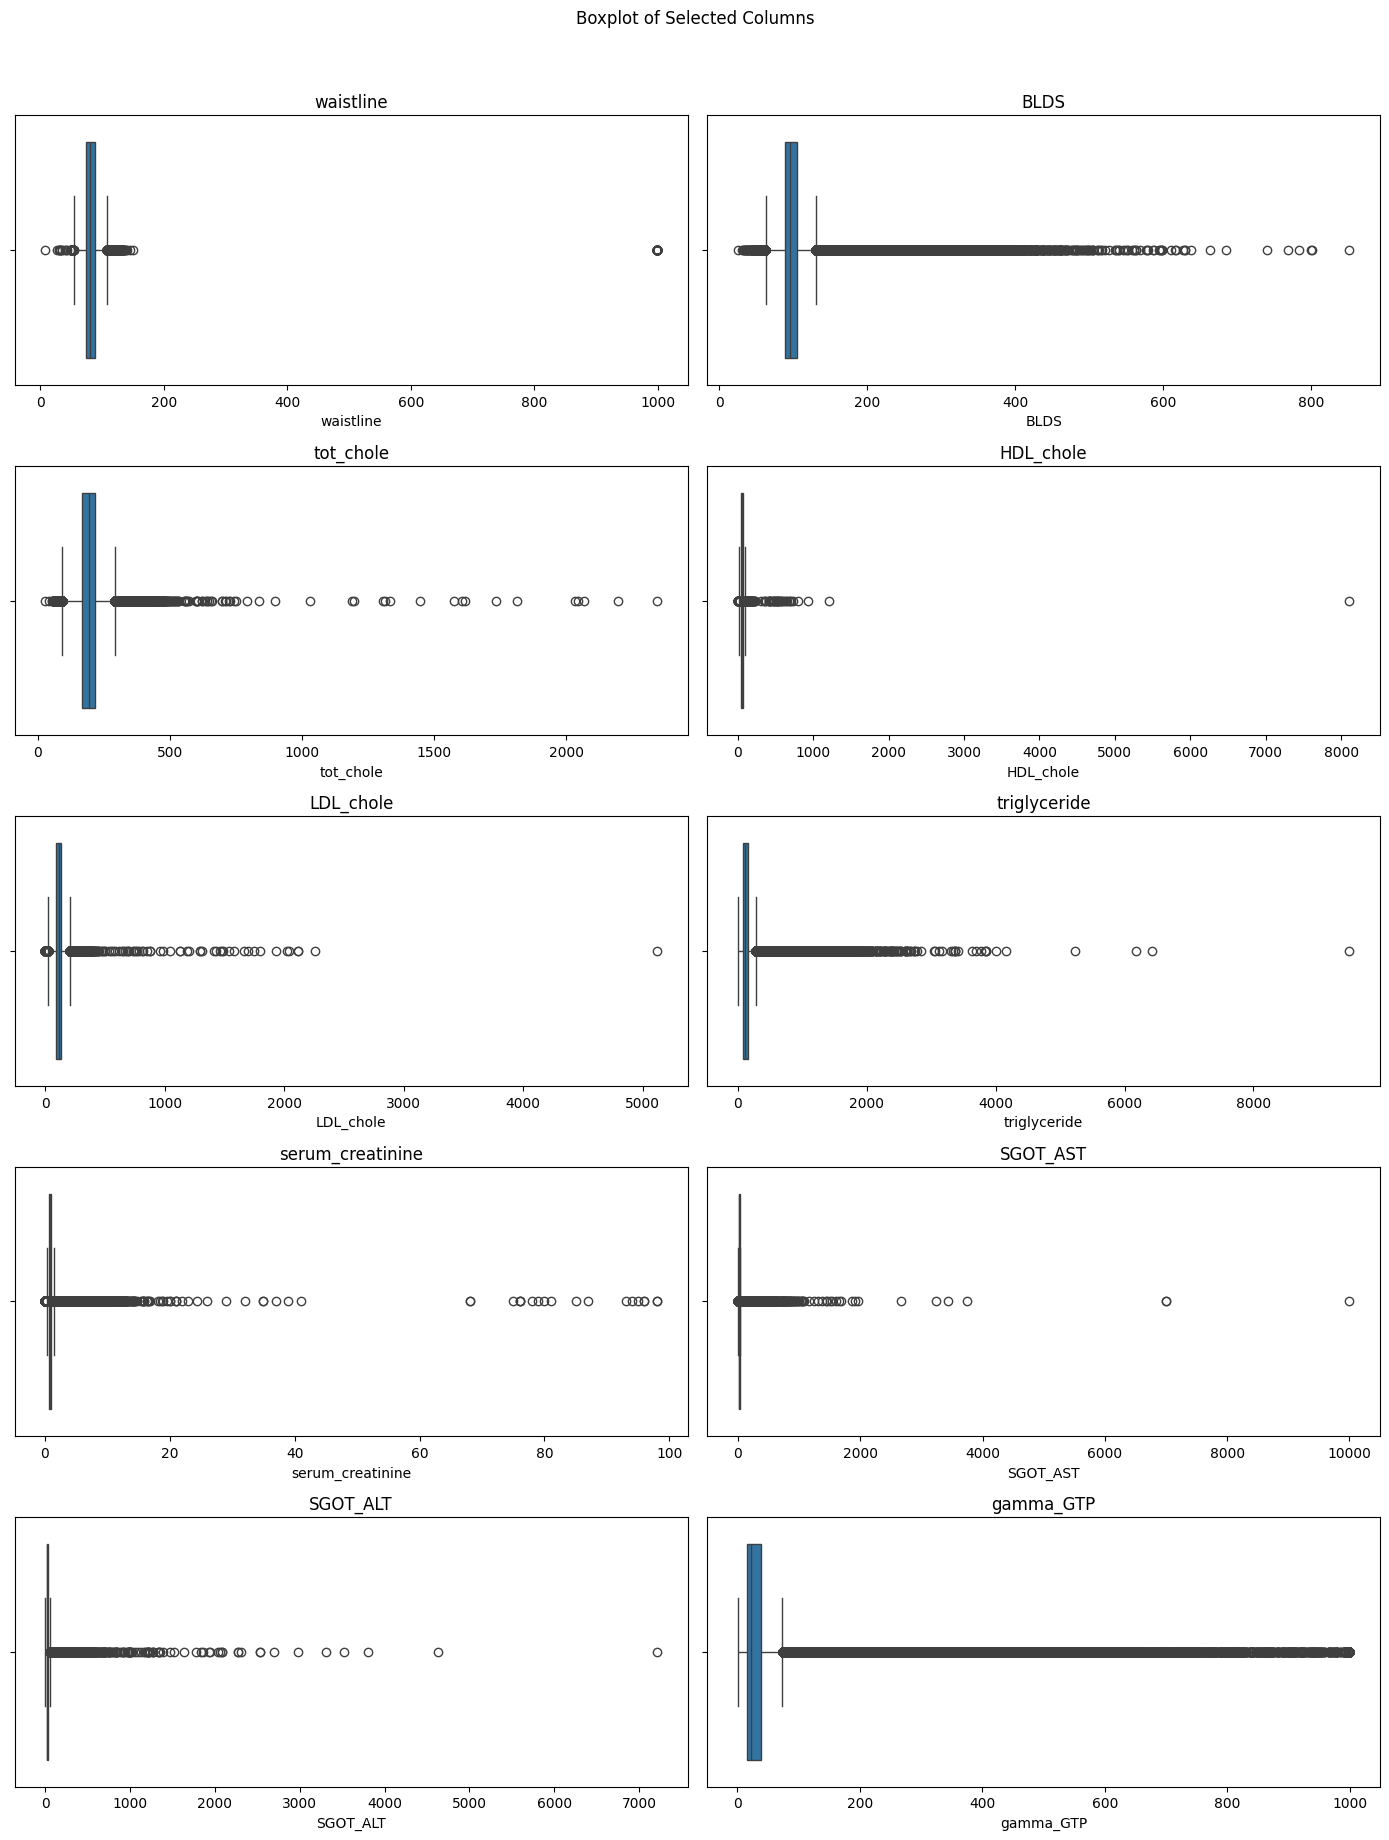

In [12]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(14, 18))
fig.suptitle('Boxplot of Selected Columns', y=1.02)

Outliers_features_list = ['waistline', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',
            'triglyceride', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']

for i, col in enumerate(Outliers_features_list):
    sns.boxplot(x=df[col], ax=axs[i//2, i % 2])
    axs[i//2, i % 2].set_title(col)

plt.tight_layout()
plt.show()

When we look at the BoxPlots of the features we previously suspected to be outliers, we see how right we were in our suspicions. It is important for a correct process that we detect and remove these outliers before machine learning algorithms.

### Heat Map

In [13]:
# To include drinking status and sex, let's label them with 1 and 0.
df_ = df.copy()
df_['DRK_YN'] = df_['DRK_YN'].map({'Y': 1, 'N': 0})
df_['sex'] = df_['sex'].map({'Male': 1, 'Female': 0}) 
df_.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


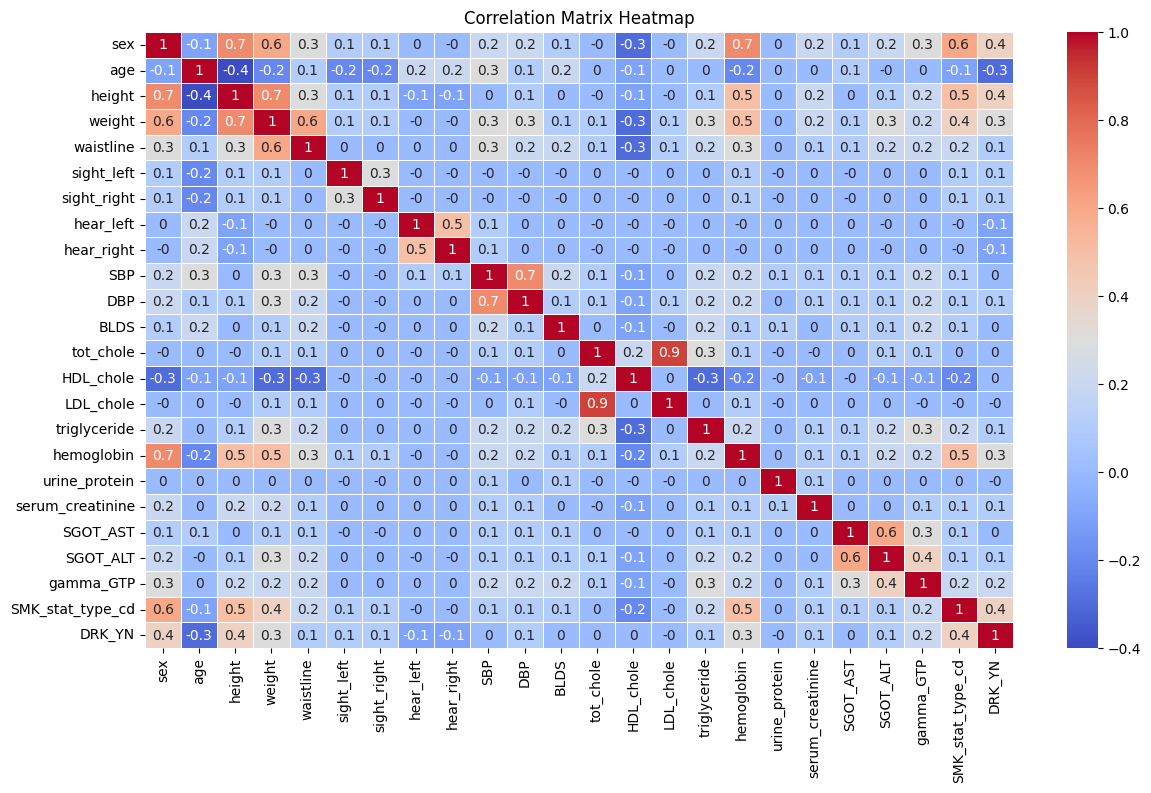

In [14]:
correlation_matrix = df_.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(round(correlation_matrix,1), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

At first, the direct proportion between alcohol consumption and cigarette consumption that we mentioned in the previous images stands out. We also talked about combining right and left in vision, but according to this table, the correlation constant between them was lower than we expected, as in the right and left ears. Since LDL_chole and tot_chole have the highest coefficient, a column can be removed, but removing the outliers will be sufficient. There is a slightly inverse relationship between age and alcohol consumption. This leads to the conclusion that older people should be warned even more about this issue.

# 3. Data Preprocessing

**It will be useful to drop outlier data before moving on to the feature engineering step.**

In [15]:
def remove_outliers(df, feature, iqr_factor):
    data = df[feature]
    
    # Calculate the interquartile range (IQR)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds
    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR
    
    # Filter rows with values outside the bounds
    filtered_df = df[(data >= lower_bound) & (data <= upper_bound)]
    
    return filtered_df

filt_df = df.copy()
for i in Outliers_features_list:
    filt_df = remove_outliers(filt_df, i, iqr_factor=2)

filt_df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000
mean,47.319006,161.584202,61.607299,79.774828,0.979187,0.976073,1.030716,1.029728,121.102129,75.144832,95.642032,193.299896,57.854861,113.112911,111.299411,14.050410,1.074313,0.836633,22.601023,20.323380,24.112020,1.523485
std,14.442922,9.245664,11.682217,9.192617,0.591877,0.588645,0.172548,0.169836,14.262956,9.631207,12.258935,35.500722,14.195061,32.493653,56.990176,1.544551,0.373193,0.194435,6.141732,9.083962,13.094543,0.783010
min,20.000000,130.000000,25.000000,49.000000,0.100000,0.100000,1.000000,1.000000,70.000000,33.000000,54.000000,72.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,73.000000,0.700000,0.700000,1.000000,1.000000,110.000000,70.000000,88.000000,169.000000,47.000000,90.000000,69.000000,13.000000,1.000000,0.700000,18.000000,14.000000,15.000000,1.000000
50%,45.000000,160.000000,60.000000,80.000000,1.000000,1.000000,1.000000,1.000000,120.000000,75.000000,94.000000,192.000000,56.000000,111.000000,97.000000,14.000000,1.000000,0.800000,22.000000,18.000000,20.000000,1.000000
75%,60.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.000000,1.000000,130.000000,80.000000,102.000000,216.000000,67.000000,134.000000,140.000000,15.200000,1.000000,1.000000,26.000000,25.000000,30.000000,2.000000
max,85.000000,190.000000,130.000000,115.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,139.000000,317.000000,106.000000,225.000000,322.000000,25.000000,6.000000,1.600000,46.000000,53.000000,69.000000,3.000000


Now, unrealistic and erroneous data has been cleared from the mentioned columns. We now have a more realistic data set.

### Feature Engineering
**It will be useful to derive new features using the features in the data set and thus reduce the number of columns.**

**Body mass index:** This feature will be derived using the height and mass features. 

**Visual impairment:** Average visual defect of the right and left eye.

**Hearing health:** Shows whether the person has a hearing impairment using the hear_left and hear_right features.

**Blood Pressure:** Shows the person's blood pressure condition using SBP(systolic blood pressure) and DBP(diastolic blood pressure) values.

**AST/ALT ratio:** This is called De Ritis ratio in medicine and provides information about a person's alcoholic hepatitis status

Also, LDL_chole and HDL_chole features are good to be dropped because they are already used in calculating total cholesterol

(Total cholesterol = LDL cholesterol + HDL cholesterol + 1/5 x triglyceride).

In [16]:
# Body Mass Index (BMI)
def calculate_bmi(height, weight): 
    height_in_meters = height / 100 # cm -> m
    bmi = weight / (height_in_meters ** 2) 
    return bmi

filt_df['bmi'] = filt_df.apply(lambda row: calculate_bmi(row['height'], row['weight']), axis=1)
filt_df = filt_df.drop(['height', 'weight'], axis=1)
filt_df.insert(loc=2, column='BMI', value=filt_df['bmi'])
filt_df = filt_df.drop('bmi', axis=1)

# Visual impairment
visual_impairment = (filt_df["sight_left"] + filt_df["sight_right"]) / 2
filt_df.insert(loc=4, column='visual_impairment', value = visual_impairment)
filt_df = filt_df.drop(['sight_right', 'sight_left'], axis=1)

# Hearing health
filt_df.insert(5, 'hearing_health', 'Healthy')
filt_df.loc[(filt_df['hear_left'] == 2) | (filt_df['hear_right'] == 2), 'hearing_health'] = "Defective"
filt_df = filt_df.drop(['hear_right', 'hear_left'], axis=1)

# Blood pressure
def categorize_blood_pressure(sbp, dbp):
    if sbp < 130 and dbp < 85:
        return 'Normal'
    elif 130 <= sbp < 140 or 85 <= dbp < 90:
        return 'High-Normal'
    elif sbp >= 140 or dbp >= 90:
        return 'Hypertension'

filt_df.insert(6, 'blood_pressure', 'None')
filt_df['blood_pressure'] = filt_df.apply(lambda row: categorize_blood_pressure(row['SBP'], row['DBP']), axis=1)
filt_df = filt_df.drop(['SBP', 'DBP'], axis=1)

# AST/ALT (De Ritis Ratio)
de_ritis = filt_df["SGOT_AST"] / filt_df["SGOT_ALT"]
filt_df.insert(loc = 7, column = 'AST/ALT', value = de_ritis)
filt_df = filt_df.drop(['SGOT_AST', 'SGOT_ALT'], axis=1)

# Dropping LDL_chole and HDL_chole
filt_df = filt_df.drop(["HDL_chole", "LDL_chole"], axis=1)

In [17]:
filt_df

,sex,age,BMI,waistline,visual_impairment,hearing_health,blood_pressure,AST/ALT,BLDS,tot_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,25.951557,90.0,1.00,Healthy,Normal,0.600000,99.0,193.0,92.0,17.1,1.0,1.0,40.0,1.0,Y
1,Male,30,24.691358,89.0,1.05,Healthy,High-Normal,0.555556,106.0,228.0,121.0,15.8,1.0,0.9,27.0,3.0,N
3,Male,50,26.122449,91.0,1.35,Healthy,High-Normal,0.852941,95.0,201.0,106.0,17.6,1.0,1.1,18.0,1.0,N
4,Male,50,22.038567,80.0,1.10,Healthy,High-Normal,1.583333,101.0,199.0,104.0,13.8,1.0,0.8,25.0,1.0,N
5,Male,50,20.202020,75.0,1.35,Healthy,Hypertension,0.725000,99.0,218.0,232.0,13.8,3.0,0.8,37.0,3.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,26.122449,92.1,1.50,Healthy,Normal,0.722222,88.0,198.0,132.0,15.0,1.0,1.0,27.0,1.0,N
991342,Male,35,25.951557,86.0,1.25,Healthy,Normal,0.823529,83.0,133.0,45.0,15.8,1.0,1.1,15.0,1.0,N
991343,Female,40,20.811655,68.0,0.85,Healthy,Normal,1.111111,90.0,205.0,157.0,14.3,1.0,0.8,17.0,3.0,Y
991344,Male,25,19.591837,72.0,1.25,Healthy,Normal,1.500000,69.0,122.0,53.0,14.5,1.0,0.8,17.0,1.0,N


### Encoding (Categorical to Numerical)

In [18]:
df_encoded = pd.get_dummies(filt_df, columns=['sex'], dtype=int)
df_encoded = pd.get_dummies(df_encoded, columns=['hearing_health'], dtype=int)

le = LabelEncoder()
df_encoded["blood_pressure"] = le.fit_transform(df_encoded["blood_pressure"])
df_encoded["blood_pressure"] = (df_encoded["blood_pressure"] + 1) % 3

df_encoded

,age,BMI,waistline,visual_impairment,blood_pressure,AST/ALT,BLDS,tot_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,gamma_GTP,SMK_stat_type_cd,DRK_YN,sex_Female,sex_Male,hearing_health_Defective,hearing_health_Healthy
0,35,25.951557,90.0,1.00,0,0.600000,99.0,193.0,92.0,17.1,1.0,1.0,40.0,1.0,Y,0,1,0,1
1,30,24.691358,89.0,1.05,1,0.555556,106.0,228.0,121.0,15.8,1.0,0.9,27.0,3.0,N,0,1,0,1
3,50,26.122449,91.0,1.35,1,0.852941,95.0,201.0,106.0,17.6,1.0,1.1,18.0,1.0,N,0,1,0,1
4,50,22.038567,80.0,1.10,1,1.583333,101.0,199.0,104.0,13.8,1.0,0.8,25.0,1.0,N,0,1,0,1
5,50,20.202020,75.0,1.35,2,0.725000,99.0,218.0,232.0,13.8,3.0,0.8,37.0,3.0,Y,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,45,26.122449,92.1,1.50,0,0.722222,88.0,198.0,132.0,15.0,1.0,1.0,27.0,1.0,N,0,1,0,1
991342,35,25.951557,86.0,1.25,0,0.823529,83.0,133.0,45.0,15.8,1.0,1.1,15.0,1.0,N,0,1,0,1
991343,40,20.811655,68.0,0.85,0,1.111111,90.0,205.0,157.0,14.3,1.0,0.8,17.0,3.0,Y,1,0,0,1
991344,25,19.591837,72.0,1.25,0,1.500000,69.0,122.0,53.0,14.5,1.0,0.8,17.0,1.0,N,0,1,0,1


In [19]:
df_encoded.insert(loc=0, column="sex", value=df_encoded["sex_Male"])
df_encoded = df_encoded.drop(["sex_Male", "sex_Female"], axis=1)

df_encoded.insert(loc=5, column="hearing_impairment", value=df_encoded["hearing_health_Defective"])
df_encoded = df_encoded.drop(["hearing_health_Defective", "hearing_health_Healthy"], axis=1)
df_encoded

,sex,age,BMI,waistline,visual_impairment,hearing_impairment,blood_pressure,AST/ALT,BLDS,tot_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,25.951557,90.0,1.00,0,0,0.600000,99.0,193.0,92.0,17.1,1.0,1.0,40.0,1.0,Y
1,1,30,24.691358,89.0,1.05,0,1,0.555556,106.0,228.0,121.0,15.8,1.0,0.9,27.0,3.0,N
3,1,50,26.122449,91.0,1.35,0,1,0.852941,95.0,201.0,106.0,17.6,1.0,1.1,18.0,1.0,N
4,1,50,22.038567,80.0,1.10,0,1,1.583333,101.0,199.0,104.0,13.8,1.0,0.8,25.0,1.0,N
5,1,50,20.202020,75.0,1.35,0,2,0.725000,99.0,218.0,232.0,13.8,3.0,0.8,37.0,3.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,26.122449,92.1,1.50,0,0,0.722222,88.0,198.0,132.0,15.0,1.0,1.0,27.0,1.0,N
991342,1,35,25.951557,86.0,1.25,0,0,0.823529,83.0,133.0,45.0,15.8,1.0,1.1,15.0,1.0,N
991343,0,40,20.811655,68.0,0.85,0,0,1.111111,90.0,205.0,157.0,14.3,1.0,0.8,17.0,3.0,Y
991344,1,25,19.591837,72.0,1.25,0,0,1.500000,69.0,122.0,53.0,14.5,1.0,0.8,17.0,1.0,N


### Scaling 

In [20]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 785386 entries, 0 to 991345
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   sex                 785386 non-null  int32  
 1   age                 785386 non-null  int64  
 2   BMI                 785386 non-null  float64
 3   waistline           785386 non-null  float64
 4   visual_impairment   785386 non-null  float64
 5   hearing_impairment  785386 non-null  int32  
 6   blood_pressure      785386 non-null  int32  
 7   AST/ALT             785386 non-null  float64
 8   BLDS                785386 non-null  float64
 9   tot_chole           785386 non-null  float64
 10  triglyceride        785386 non-null  float64
 11  hemoglobin          785386 non-null  float64
 12  urine_protein       785386 non-null  float64
 13  serum_creatinine    785386 non-null  float64
 14  gamma_GTP           785386 non-null  float64
 15  SMK_stat_type_cd    785386 non-null  fl

int32 type columns are which we encoded in previous step and they won't be scaled.

**Columns other than including continuous values shouldn't be scaled.**
- Ordinal variables represent ordered categories. While they have some level of ordering, the scale may not be uniformly interpretable across all categories.
-  Scaling won't change the nature of binary variables, and the interpretation of their values remains the same. In fact, scaling binary variables may not make sense and can sometimes even distort their meaning.

In [21]:
standard_scaler = StandardScaler()
df_std_scaled = df_encoded.copy()
df_rb_scaled = df_encoded.copy()

continuous_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
continuous_columns = continuous_columns.drop(["SMK_stat_type_cd"])

df_std_scaled[continuous_columns] = standard_scaler.fit_transform(df_encoded[continuous_columns])
df_std_scaled

,sex,age,BMI,waistline,visual_impairment,hearing_impairment,blood_pressure,AST/ALT,BLDS,tot_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,-0.852945,0.735922,1.112325,0.046668,0,0,-1.443020,0.273920,-0.008448,-0.338645,1.974420,-0.199126,0.840213,1.213329,1.0,Y
1,1,-1.199135,0.358725,1.003542,0.150977,0,1,-1.542539,0.844933,0.977448,0.170215,1.132751,-0.199126,0.325901,0.220548,3.0,N
3,1,0.185627,0.787072,1.221108,0.776833,0,1,-0.876639,-0.052373,0.216900,-0.092988,2.298139,-0.199126,1.354524,-0.466761,1.0,N
4,1,0.185627,-0.435297,0.024495,0.255286,0,1,0.758841,0.437067,0.160563,-0.128082,-0.162125,-0.199126,-0.188410,0.067813,1.0,N
5,1,0.185627,-0.985004,-0.519420,0.776833,0,2,-1.163122,0.273920,0.695764,2.117921,-0.162125,5.160037,-0.188410,0.984226,3.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,-0.160564,0.787072,1.340770,1.089761,0,0,-1.169342,-0.623385,0.132395,0.363231,0.614801,-0.199126,0.840213,0.220548,1.0,N
991342,1,-0.852945,0.735922,0.677193,0.568214,0,0,-0.942497,-1.031251,-1.698555,-1.163349,1.132751,-0.199126,1.354524,-0.695864,1.0,N
991343,0,-0.506754,-0.802531,-1.280901,-0.266260,0,0,-0.298550,-0.460239,0.329574,0.801903,0.161594,-0.199126,-0.188410,-0.543129,3.0,Y
991344,1,-1.545326,-1.167641,-0.845769,0.568214,0,0,0.572243,-2.173276,-2.008408,-1.022974,0.291082,-0.199126,-0.188410,-0.543129,1.0,N


In [22]:
robust_scaler = RobustScaler()
df_rb_scaled[continuous_columns] = robust_scaler.fit_transform(df_encoded[continuous_columns])

df_rb_scaled

,sex,age,BMI,waistline,visual_impairment,hearing_impairment,blood_pressure,AST/ALT,BLDS,tot_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,-0.4,0.560276,0.769231,0.111111,0,0,-1.148496,0.357143,0.021277,-0.070423,1.409091,0.0,0.666667,1.333333,1.0,Y
1,1,-0.6,0.279432,0.692308,0.222222,0,1,-1.235380,0.857143,0.765957,0.338028,0.818182,0.0,0.333333,0.466667,3.0,N
3,1,0.2,0.598361,0.846154,0.888889,0,1,-0.654025,0.071429,0.191489,0.126761,1.636364,0.0,1.000000,-0.133333,1.0,N
4,1,0.2,-0.311763,0.000000,0.333333,0,1,0.773810,0.500000,0.148936,0.098592,-0.090909,0.0,0.000000,0.333333,1.0,N
5,1,0.2,-0.721051,-0.384615,0.888889,0,2,-0.904135,0.357143,0.553191,1.901408,-0.090909,2.0,0.000000,1.133333,3.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,0.0,0.598361,0.930769,1.222222,0,0,-0.909566,-0.428571,0.127660,0.492958,0.454545,0.0,0.666667,0.466667,1.0,N
991342,1,-0.4,0.560276,0.461538,0.666667,0,0,-0.711521,-0.785714,-1.255319,-0.732394,0.818182,0.0,1.000000,-0.333333,1.0,N
991343,0,-0.2,-0.585189,-0.923077,-0.222222,0,0,-0.149332,-0.285714,0.276596,0.845070,0.136364,0.0,0.000000,-0.200000,3.0,Y
991344,1,-0.8,-0.857035,-0.615385,0.666667,0,0,0.610902,-1.785714,-1.489362,-0.619718,0.227273,0.0,0.000000,-0.200000,1.0,N


# 4. Model Development and Evaluation

Each model is going to be trained for both standard and robust scaled data sets. Also models will be evaluated.

In [23]:
# Standard Scaler
X = df_std_scaled.iloc[:,:-1]
y = df_std_scaled.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Standard Scaled
---------------
Decision Tree:
Accuracy Score: 0.6255252181087564
              precision    recall  f1-score   support

           N       0.65      0.65      0.65    104798
           Y       0.60      0.60      0.60     91549

    accuracy                           0.63    196347
   macro avg       0.62      0.62      0.62    196347
weighted avg       0.63      0.63      0.63    196347
 



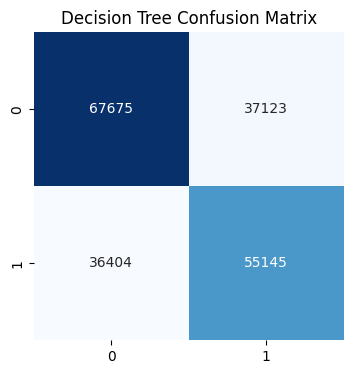

Standard Scaled
---------------
Random Forest
Classifier:
Accuracy Score: 0.7113579530117597
              precision    recall  f1-score   support

           N       0.72      0.74      0.73    104798
           Y       0.70      0.68      0.69     91549

    accuracy                           0.71    196347
   macro avg       0.71      0.71      0.71    196347
weighted avg       0.71      0.71      0.71    196347
 



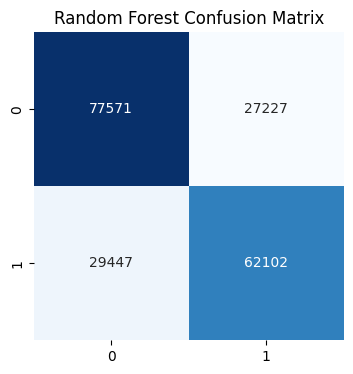

Standard Scaled
---------------
Gaussian
Naive Bayes:
Accuracy Score: 0.6799900176727935
              precision    recall  f1-score   support

           N       0.69      0.72      0.70    104798
           Y       0.66      0.64      0.65     91549

    accuracy                           0.68    196347
   macro avg       0.68      0.68      0.68    196347
weighted avg       0.68      0.68      0.68    196347



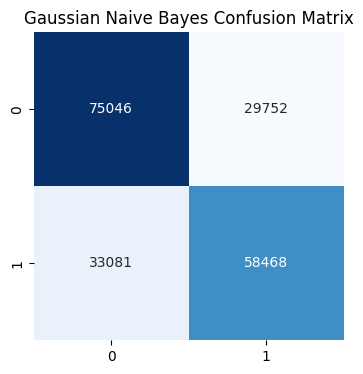

C:\Users\osati\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Standard Scaled
---------------
k-Nearest
Neighbors:
Accuracy Score: 0.6725083652920595
              precision    recall  f1-score   support

           N       0.69      0.69      0.69    104798
           Y       0.65      0.65      0.65     91549

    accuracy                           0.67    196347
   macro avg       0.67      0.67      0.67    196347
weighted avg       0.67      0.67      0.67    196347



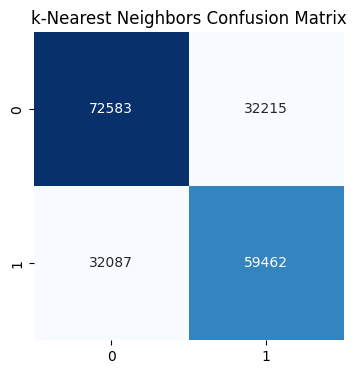

In [24]:
print("Standard Scaled")
print("---------------")
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
report = classification_report(y_test, y_pred)

print("Decision Tree:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(report,"\n")
cm_dtc = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_dtc, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.show()


# Random Forest
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
report = classification_report(y_test, y_pred)

# print("Random Forest:",accuracy_score(y_test, y_pred))
print("Standard Scaled")
print("---------------")
print("Random Forest\nClassifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(report,"\n")
cm_rfc = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_rfc, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.show()

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
report = classification_report(y_test, y_pred)

# print("Gaussian Naive Bayes:", accuracy_score(y_test, y_pred))
print("Standard Scaled")
print("---------------")
print("Gaussian\nNaive Bayes:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(report)
cm_gnb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_gnb, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()

# # Support Vector Classifier
# svc = SVC()
# svc.fit(X_train, y_train)
# y_pred = svc.predict(X_test)
# report = classification_report(y_test, y_pred)

# # print("Support Vector Classifier:", accuracy_score(y_test, y_pred))
# print("Support Vector\nClassifier:")
# print(report, "\n")
# cm_svc = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(4, 4))
# sns.heatmap(cm_svc, annot=True, fmt='g', cmap='Blues', cbar=False)
# plt.title('Support Vector Classifier Confusion Matrix')
# plt.show()

# k-Nearest Neighbors (KNN)
X_test = np.array(X_test)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred)

# print("k-Nearest Neighbors:", accuracy_score(y_test, y_pred))
print("Standard Scaled")
print("---------------")
print("k-Nearest\nNeighbors:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(report)
cm_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('k-Nearest Neighbors Confusion Matrix')
plt.show()

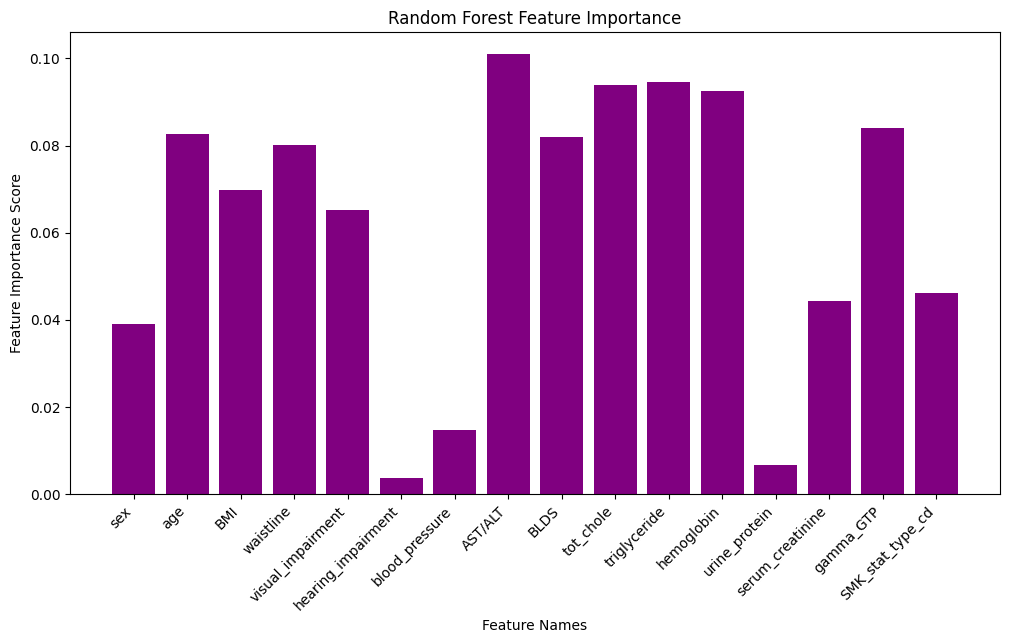

In [25]:
feature_importances = rfc.feature_importances_

feature_names = X_train.columns

plt.figure(figsize=(12, 6))
plt.bar(feature_names, feature_importances, color="purple")
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance Score')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45, ha="right")
plt.show()

In [26]:
# Robust Scaler
X = df_rb_scaled.iloc[:,:-1]
y = df_rb_scaled.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Robust Scaled
---------------
Decision Tree:
Accuracy Score: 0.6246288458698122
              precision    recall  f1-score   support

           N       0.65      0.65      0.65    104798
           Y       0.60      0.60      0.60     91549

    accuracy                           0.62    196347
   macro avg       0.62      0.62      0.62    196347
weighted avg       0.62      0.62      0.62    196347
 



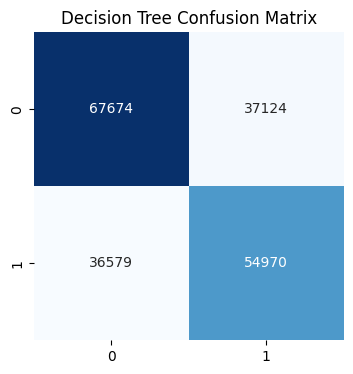

Robust Scaled
---------------
Random Forest
Classifier:
Accuracy Score: 0.7113528599876748
              precision    recall  f1-score   support

           N       0.72      0.74      0.73    104798
           Y       0.70      0.68      0.69     91549

    accuracy                           0.71    196347
   macro avg       0.71      0.71      0.71    196347
weighted avg       0.71      0.71      0.71    196347
 



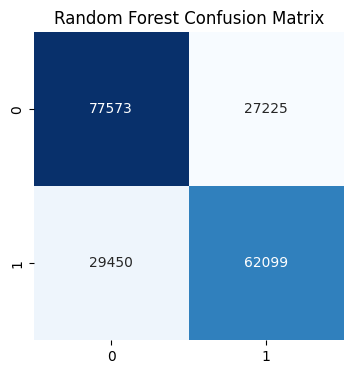

Robust Scaled
---------------
Gaussian
Naive Bayes:
Accuracy Score: 0.6799900176727935
              precision    recall  f1-score   support

           N       0.69      0.72      0.70    104798
           Y       0.66      0.64      0.65     91549

    accuracy                           0.68    196347
   macro avg       0.68      0.68      0.68    196347
weighted avg       0.68      0.68      0.68    196347



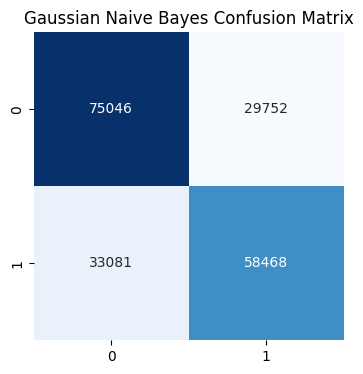

C:\Users\osati\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Robust Scaled
---------------
k-Nearest
Neighbors:
Accuracy Score: 0.6724676210993802
              precision    recall  f1-score   support

           N       0.69      0.69      0.69    104798
           Y       0.65      0.65      0.65     91549

    accuracy                           0.67    196347
   macro avg       0.67      0.67      0.67    196347
weighted avg       0.67      0.67      0.67    196347



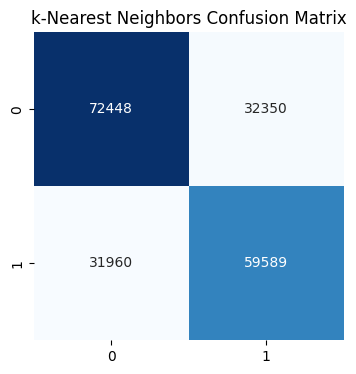

In [27]:
print("Robust Scaled")
print("---------------")
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
report = classification_report(y_test, y_pred)

print("Decision Tree:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(report,"\n")
cm_dtc = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_dtc, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Random Forest
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
report = classification_report(y_test, y_pred)

print("Robust Scaled")
print("---------------")
print("Random Forest\nClassifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(report,"\n")
cm_rfc = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_rfc, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.show()

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
report = classification_report(y_test, y_pred)

print("Robust Scaled")
print("---------------")
print("Gaussian\nNaive Bayes:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(report)
cm_gnb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_gnb, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()

# # Support Vector Classifier
# svc = SVC()
# svc.fit(X_train, y_train)
# y_pred = svc.predict(X_test)
# report = classification_report(y_test, y_pred)

# print("Support Vector Classifier:", accuracy_score(y_test, y_pred))
# print("Support Vector\nClassifier:")
# print(report, "\n")
# cm_svc = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(4, 4))
# sns.heatmap(cm_svc, annot=True, fmt='g', cmap='Blues', cbar=False)
# plt.title('Support Vector Classifier Confusion Matrix')
# plt.show()

# k-Nearest Neighbors (KNN)
X_test = np.array(X_test)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred)

print("Robust Scaled")
print("---------------")
print("k-Nearest\nNeighbors:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(report)
cm_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('k-Nearest Neighbors Confusion Matrix')
plt.show()

**Since Support Vector Classifier was very costly, no output could be obtained due to the size of the data set. That's why it was put in the comment line. But in later stages, cost can be reduced and optimization can be achieved through sampling.**
* Random Forest consistently outperforms other models in terms of accuracy, precision, recall, and F1-score for both scaling techniques.
* Gaussian Naive Bayes and k-Nearest Neighbors demonstrate similar performance.
* Decision Tree shows decent performance but is slightly less accurate compared to Random Forest.
* The choice of scaling technique (Standard or Robust) does not significantly impact the model performance in this context.


# 5.Further Development of the Model

### 5.1.IQR Factor Optimization

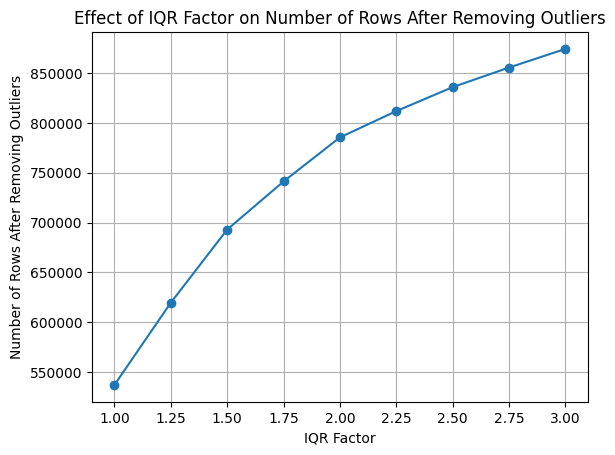

In [28]:
original_row_count = len(df)

iqr_factors = np.arange(1, 3.25, 0.25)
row_counts = []

for factor in iqr_factors:
    filt_df = df.copy()
    for feature in Outliers_features_list:
        filt_df = remove_outliers(filt_df, feature, factor)
    row_counts.append(len(filt_df))

plt.plot(iqr_factors, row_counts, marker='o')
plt.xlabel('IQR Factor')
plt.ylabel('Number of Rows After Removing Outliers')
plt.title('Effect of IQR Factor on Number of Rows After Removing Outliers')
plt.grid(True)
plt.show()

When the graph is examined, there is a break at the point where iqr_factor is 2. In addition, while there is a lot of data loss for values between 1 and 2, outlier data is removed less for values greater than 2. For these reasons, we decide that the optimum value is 2. However, we had already selected iqr_factor as 2 during the previous deletion of outlier data.

### 5.2.PCA

**Accuracy score can be increased by dimension reduction with PCA**

In [29]:
from sklearn.decomposition import PCA

df_std_scaled_X = df_std_scaled.drop('DRK_YN', axis=1)
df_std_scaled_y = df_std_scaled['DRK_YN']
df_std_scaled_y = df_std_scaled_y.reset_index().drop(["index"], axis=1)

pca = PCA(n_components=8)

# PCA modelini veri setine uygula
X_pca = pca.fit_transform(df_std_scaled_X)
X_pca = pd.DataFrame(X_pca)

# Splitting the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, df_std_scaled_y, test_size=0.3, random_state=42)

df_pca = pd.concat([X_pca, df_std_scaled_y], axis=1)
df_pca

,0,1,2,3,4,5,6,7,DRK_YN
0,-2.394836,1.313178,0.169355,-0.592560,-0.204759,-0.532264,-0.613968,-0.950240,Y
1,-2.271460,1.117228,-0.648338,-0.199498,-0.073324,-0.093625,-0.755879,-1.204592,N
2,-2.174673,0.944570,0.365279,-0.366359,-0.106648,0.102711,0.969268,-1.147925,N
3,0.330470,-0.329515,0.000484,0.318254,-0.177800,0.695055,0.294562,-0.027113,N
4,-1.458634,0.085746,-0.344359,2.554715,4.787899,0.177916,-1.579155,1.538356,Y
...,...,...,...,...,...,...,...,...,...
785381,-1.730276,0.774472,-0.270509,-1.141858,0.251293,0.044249,0.602172,-0.119706,N
785382,-0.527648,1.935370,1.756276,-1.543749,-0.159908,-0.629257,0.527986,-0.608239,N
785383,0.676461,0.922799,-0.931654,0.816318,-0.306457,-0.396666,-0.566078,0.445112,Y
785384,2.275836,2.550861,0.999744,-0.866681,-0.128395,-0.746466,0.251237,0.988152,N


When we ran machine learning models using the data frame created by the PCA method, we realized that this method was very costly. Therefore, we concluded that using PCA would be useless.

### 5.3.Random Sampling

**We were unable to run the SVC algorithm because it was very costly due to the size of the data set. With random sampling, we can reduce the cost and run the SVC model by selecting a random subset of the data set.**

In [30]:
df_sampled = df_std_scaled.sample(n=70000, random_state=42)
X_sampled = df_sampled.iloc[:,:-1]
y_sampled = df_sampled.iloc[:,-1]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)

Support Vector
Classifier:
Accuracy Score: 0.7103333333333334
              precision    recall  f1-score   support

           N       0.73      0.73      0.73     11237
           Y       0.69      0.69      0.69      9763

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000
 



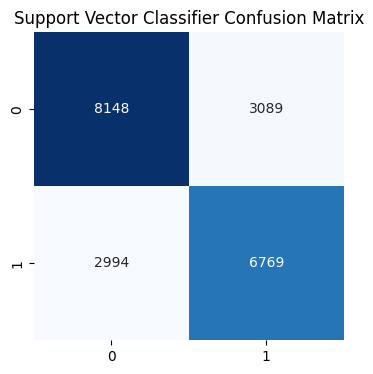

In [31]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train_s, y_train_s)
y_pred = svc.predict(X_test_s)
report = classification_report(y_test_s, y_pred)

print("Support Vector\nClassifier:")
print("Accuracy Score:", accuracy_score(y_test_s, y_pred))
print(report, "\n")
cm_svc = confusion_matrix(y_test_s, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_svc, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Support Vector Classifier Confusion Matrix')
plt.show()

**A higher accuracy value was obtained with Random Forest. Additionally, Random Forest allows us to use the entire dataset. For these reasons, we decided that the most accurate machine learning model is Random Forest.**

### 5.4.Grid Search CV

Now, in order to further increase the accuracy value of Random Forest, we will need to determine parameters that are more suitable for the data set. However, since this process is costly, we will again use the Random Sampling method.

In [32]:
df_sampled = df_std_scaled.sample(n=7000, random_state=42)
X_sampled = df_sampled.iloc[:,:-1]
y_sampled = df_sampled.iloc[:,-1]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)

In [33]:
rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_s, y_train_s)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
Best score:  0.7075510204081633


**We will run the Random Forest model on the entire data set with the determined parameters and reach the final result.**

After determining the best parameters(Random Forest Classifier)
Accuracy Score: 0.7123307206119778

               precision    recall  f1-score   support

           N       0.73      0.73      0.73    104798
           Y       0.69      0.69      0.69     91549

    accuracy                           0.71    196347
   macro avg       0.71      0.71      0.71    196347
weighted avg       0.71      0.71      0.71    196347
 



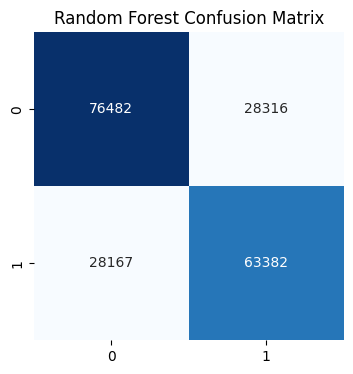

In [34]:
# Random Forest
X = df_std_scaled.iloc[:,:-1]
y = df_std_scaled.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rfc = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=10)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
report = classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

print("After determining the best parameters(Random Forest Classifier)")
print("Accuracy Score:", accuracy)
print("\n",report,"\n")
cm_rfc = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_rfc, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.show()

**The final accuracy value we obtained is 0.7123358136360627.**

Trained on a dataset from the Korean health ministry, this model performed well, with approximately 71% accuracy. Although many different ways were tried to increase this value, the maximum obtained value could not be changed. Additionally, we saw that this value could not be exceeded in similar studies using this data set. As you will appreciate, it is not easy to predict whether a person drinks alcohol or not. Considering all this, the success of the model is quite acceptable.